# 目標  
預測「巴哈姆特動畫瘋」之上架動畫的平均觀看數

# 視覺化

In [46]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/BaHaMut_9.csv')
df

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
0,叫我對大哥 (TV版),2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,1.8,21.7
1,汪汪與喵喵,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0.3,6.6
2,鬼滅之刃 刀匠村篇,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,49.9,548.8
3,IDOLiSH7 - 偶像星願 - Third BEAT！,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,1.9,56.0
4,薄櫻鬼 新OVA,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,1.6,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,土下座跪求給看 年齡限制版,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,8.0,103.4
434,女神宿舍的管理員。 年齡限制版,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,11.3,112.7
435,彼得・格里爾的賢者時間 年齡限制版,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,11.2,133.9
436,壽司大相撲,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0.4,23.3


In [2]:
# 設定matplotlib中文字型
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

--2023-12-17 13:01:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.139.139, 74.125.139.102, 74.125.139.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k8ruspv1e9bci8gn372jfj6q86i1kpct/1702818000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3c958033-2dbb-4427-9e3a-4ab3999b4a8c [following]
--2023-12-17 13:01:08--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k8ruspv1e9bci8gn372jfj6q86i1kpct/1702818000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3c958033-2dbb-4427-9e3a-4ab3999b4a8c
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-0

count    438.000000
mean      10.668493
std       13.564352
min        0.000000
25%        1.900000
50%        5.850000
75%       13.975000
max       93.300000
Name: 平均觀看數(萬), dtype: float64

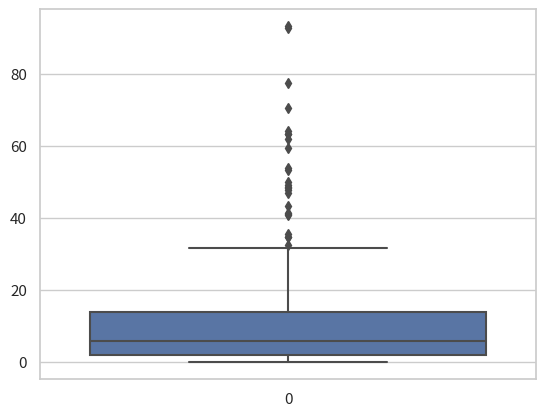

In [47]:
# 箱型圖
sns.boxplot(data=df['平均觀看數(萬)'])
df['平均觀看數(萬)'].describe()

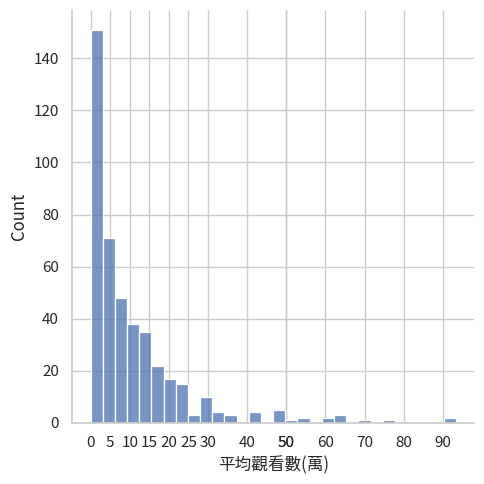

In [43]:
# 直方圖
sns.displot(data=df, x='平均觀看數(萬)')
plt.xticks([0,5,10,15,20,25,30,40,50,50,60,70,80,90])
plt.show()

# 數值資料處理

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   動畫名       438 non-null    object 
 1   年份        438 non-null    int64  
 2   月份        438 non-null    object 
 3   集數        438 non-null    int64  
 4   星級        438 non-null    float64
 5   評分人數      438 non-null    int64  
 6   導演監督      436 non-null    object 
 7   製作廠商      438 non-null    object 
 8   作品分類1     438 non-null    object 
 9   作品分類2     434 non-null    object 
 10  作品分類3     316 non-null    object 
 11  作品分類4     142 non-null    object 
 12  作品分類5     44 non-null     object 
 13  作品分類6     5 non-null      object 
 14  原作載體      438 non-null    object 
 15  新續作       438 non-null    object 
 16  平均觀看數(萬)  438 non-null    float64
 17  總觀看數(萬)   438 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 61.7+ KB


In [ ]:
# 數值資料標準化
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
df_corr = df[['集數', '星級', '評分人數', '平均觀看數(萬)']]
arr = std.fit_transform(df_corr)
df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)']] = arr
df_corr

<ipython-input-298-c7bdfd2fae8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)']] = arr


,集數,星級,評分人數,平均觀看數(萬)
0,0.101010,0.942857,0.011385,0.019293
1,0.222222,0.942857,0.003795,0.003215
2,0.090909,0.942857,0.352941,0.534834
3,0.282828,0.942857,0.024668,0.020364
4,0.010101,0.942857,0.005693,0.017149
...,...,...,...,...
433,0.111111,0.857143,0.032258,0.085745
434,0.080808,0.914286,0.043643,0.121115
435,0.101010,0.771429,0.030361,0.120043
436,0.505051,0.742857,0.007590,0.004287


In [ ]:
# 計算相關係數
featuresCorr = df_corr[['集數', '星級', '評分人數',	'平均觀看數(萬)']].corr()
featuresCorr

,集數,星級,評分人數,平均觀看數(萬)
集數,1.000000,-0.024099,0.020247,-0.016369
星級,-0.024099,1.000000,0.276898,0.262252
評分人數,0.020247,0.276898,1.000000,0.813731
平均觀看數(萬),-0.016369,0.262252,0.813731,1.000000


<Axes: xlabel='星級', ylabel='平均觀看數(萬)'>

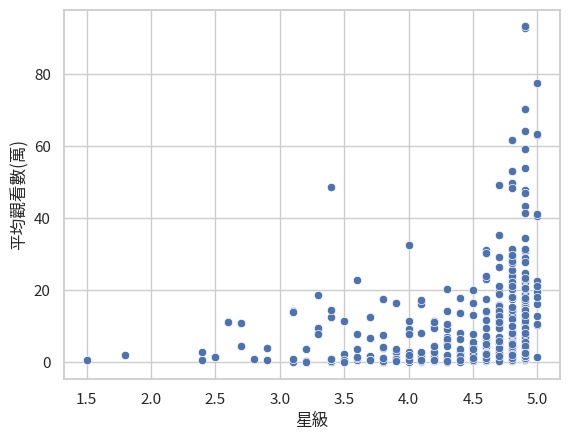

In [ ]:
# 平均觀看數與評分
sns.scatterplot(data=df, x="星級", y="平均觀看數(萬)")

# 加入人氣度

In [48]:
# 加入人氣度
p = df['平均觀看數(萬)'].to_list()
q = []
# for number in p:
#     if number >= 40:
#         q.append(3)
#     elif 40 > number >= 20:
#         q.append(2)
#     elif 20 > number >= 10:
#         q.append(1)
#     elif number < 10:
#         q.append(0)

for number in p:
  if number >= 15:
    q.append(1)
  else:
    q.append(0)

df['人氣度'] = q
df1 = df[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]
df1

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
1,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
2,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,1
3,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,0
4,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,0
...,...,...,...,...,...,...,...,...,...
433,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,0
434,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,0
435,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,0
436,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0


# 比較基準

In [352]:
# 比較基準
print(df['人氣度'].value_counts())
print()
print('人氣度0:', 339 / 438)
print(np.percentile(df['平均觀看數(萬)'],80))


0    339
1     99
Name: 人氣度, dtype: int64

人氣度0: 0.773972602739726
16.380000000000006


# 資料不降維

## CountVectorizer

In [50]:
No_DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TagList.append(tagStr)
No_DR_TagList

['喜劇 悠閒 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 泡麵番 闔家觀賞 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '偶像 音樂 遊戲改編 續作',
 '奇幻 戀愛 歷史 遊戲改編 續作',
 '科幻 機甲 喜劇 遊戲改編 新作',
 '科幻 機甲 校園 戰爭 原創作品 續作',
 '運動 競技 原創作品 續作',
 '動作 科幻 喜劇 職場 原創作品 新作',
 '冒險 奇幻 小說改編 新作',
 '動作 冒險 科幻 原創作品 新作',
 '冒險 喜劇 闔家觀賞 原創作品 新作',
 '超能力 科幻 競技 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '親情 懸疑 黑暗 漫畫改編 新作',
 '動作 冒險 異世界 血腥暴力 漫畫改編 續作',
 '親情 偶像 懸疑 漫畫改編 新作',
 '冒險 奇幻 異世界 料理 小說改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '冒險 奇幻 小說改編 新作',
 '機甲 歷史 戰爭 遊戲改編 續作',
 '校園 偶像 音樂 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '冒險 奇幻 魔法 戀愛 溫馨 漫畫改編 續作',
 '校園 青春 勵志 運動 競技 漫畫改編 續作',
 '奇幻 喜劇 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 小說改編 續作',
 '冒險 奇幻 感人 漫畫改編 續作',
 '動作 科幻 黑暗 遊戲改編 新作',
 '喜劇 青春 悠閒 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '喜劇 泡麵番 漫畫改編 新作',
 '動作 運動 競技 漫畫改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '校園 喜劇 戀愛 靈異神怪 漫畫改編 新作',
 '動作 超能力 勵志 溫馨 感人 靈異神怪 漫畫改編 續作',
 '科幻 機甲 戀愛 遊戲改編 續作',
 '奇幻 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 戰爭 血腥暴力 黑暗 18禁 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '動作 喜劇 溫馨 原創作品 新作',
 '冒險 奇幻 原創作品 新作',
 '動作 血腥暴力 漫畫改編 新作',
 '動作 奇幻 異世

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

x = No_DR_TagList
y = df['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()

print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(438, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7045454545454546
0.7272727272727273
0.6818181818181818
0.7159090909090909
0.7727272727272727
0.7386363636363636
0.7159090909090909
0.7386363636363636
0.7727272727272727
0.75



count    10.000000
mean      0.731818
std       0.028947
min       0.681818
25%       0.715909
50%       0.732955
75%       0.747159
max       0.772727
dtype: float64

### 決策樹

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier()
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7613636363636364
0.8181818181818182
0.7727272727272727
0.8295454545454546
0.8181818181818182
0.7727272727272727
0.7613636363636364
0.8522727272727273
0.875
0.7954545454545454



count    10.000000
mean      0.805682
std       0.039528
min       0.761364
25%       0.772727
50%       0.806818
75%       0.826705
max       0.875000
dtype: float64

In [ ]:
# import joblib
# joblib.dump(dec, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_CV_DT_3.pkl')

In [54]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.8081765935214211


### 隨機森林(導出模型)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8636363636363636
0.8409090909090909
0.8409090909090909
0.7727272727272727
0.8295454545454546
0.8636363636363636
0.7727272727272727
0.875
0.7840909090909091
0.8181818181818182



count    10.000000
mean      0.826136
std       0.038274
min       0.772727
25%       0.792614
50%       0.835227
75%       0.857955
max       0.875000
dtype: float64

In [62]:
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_CV_RF_60_10.pkl')

['/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_CV_RF_60_10.pkl']

In [59]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 40}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=40), best_score:0.8309561128526646


## TfidfVectorizer

In [63]:
No_DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TagList.append(tagStr)
No_DR_TagList

['喜劇 悠閒 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 泡麵番 闔家觀賞 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '偶像 音樂 遊戲改編 續作',
 '奇幻 戀愛 歷史 遊戲改編 續作',
 '科幻 機甲 喜劇 遊戲改編 新作',
 '科幻 機甲 校園 戰爭 原創作品 續作',
 '運動 競技 原創作品 續作',
 '動作 科幻 喜劇 職場 原創作品 新作',
 '冒險 奇幻 小說改編 新作',
 '動作 冒險 科幻 原創作品 新作',
 '冒險 喜劇 闔家觀賞 原創作品 新作',
 '超能力 科幻 競技 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '親情 懸疑 黑暗 漫畫改編 新作',
 '動作 冒險 異世界 血腥暴力 漫畫改編 續作',
 '親情 偶像 懸疑 漫畫改編 新作',
 '冒險 奇幻 異世界 料理 小說改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '冒險 奇幻 小說改編 新作',
 '機甲 歷史 戰爭 遊戲改編 續作',
 '校園 偶像 音樂 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '冒險 奇幻 魔法 戀愛 溫馨 漫畫改編 續作',
 '校園 青春 勵志 運動 競技 漫畫改編 續作',
 '奇幻 喜劇 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 小說改編 續作',
 '冒險 奇幻 感人 漫畫改編 續作',
 '動作 科幻 黑暗 遊戲改編 新作',
 '喜劇 青春 悠閒 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '喜劇 泡麵番 漫畫改編 新作',
 '動作 運動 競技 漫畫改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '校園 喜劇 戀愛 靈異神怪 漫畫改編 新作',
 '動作 超能力 勵志 溫馨 感人 靈異神怪 漫畫改編 續作',
 '科幻 機甲 戀愛 遊戲改編 續作',
 '奇幻 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 戰爭 血腥暴力 黑暗 18禁 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '動作 喜劇 溫馨 原創作品 新作',
 '冒險 奇幻 原創作品 新作',
 '動作 血腥暴力 漫畫改編 新作',
 '動作 奇幻 異世

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = No_DR_TagList
y = df['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(438, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.77717862 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.56922247 0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7840909090909091
0.8068181818181818
0.7613636363636364
0.7386363636363636
0.8409090909090909
0.7727272727272727
0.8636363636363636
0.75
0.7613636363636364
0.8068181818181818



count    10.000000
mean      0.788636
std       0.040514
min       0.738636
25%       0.761364
50%       0.778409
75%       0.806818
max       0.863636
dtype: float64

In [ ]:
# import joblib
# joblib.dump(nb, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Tfidf_NB.pkl')

### 決策樹

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # dec = DecisionTreeClassifier(max_depth=3)
    dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier()
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8295454545454546
0.8068181818181818
0.7386363636363636
0.7272727272727273
0.75
0.7727272727272727
0.7954545454545454
0.8068181818181818
0.7613636363636364
0.7954545454545454



count    10.000000
mean      0.778409
std       0.033561
min       0.727273
25%       0.752841
50%       0.784091
75%       0.803977
max       0.829545
dtype: float64

In [72]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 5}, best_model:DecisionTreeClassifier(max_depth=5), best_score:0.7852664576802508


### 隨機森林(導出模型)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=20)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8181818181818182
0.8181818181818182
0.7727272727272727
0.8181818181818182
0.7954545454545454
0.7727272727272727
0.8295454545454546
0.8181818181818182
0.8636363636363636
0.7613636363636364



count    10.000000
mean      0.806818
std       0.031236
min       0.761364
25%       0.778409
50%       0.818182
75%       0.818182
max       0.863636
dtype: float64

In [88]:
# 導出模型
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Tfidf_RF_60_20.pkl')

['/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Tfidf_RF_60_20.pkl']

In [89]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 10}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=10), best_score:0.8241118077324975


## 對應字典法

In [90]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}


In [91]:
df2 = df[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]

# 非數值資料轉換
df2['作品分類1'] = df2['作品分類1'].replace(dict1)
df2['作品分類2'] = df2['作品分類2'].replace(dict1)
df2['作品分類3'] = df2['作品分類3'].replace(dict1)
df2['作品分類4'] = df2['作品分類4'].replace(dict1)
df2['作品分類5'] = df2['作品分類5'].replace(dict1)
df2['作品分類6'] = df2['作品分類6'].replace(dict1)
df2['原作載體'] = df2['原作載體'].replace(dict2)
df2['新續作'] = df2['新續作'].replace(dict3)

# NULL值以0代替
df2['作品分類1'] = df2['作品分類1'].fillna(0)
df2['作品分類2'] = df2['作品分類2'].fillna(0)
df2['作品分類3'] = df2['作品分類3'].fillna(0)
df2['作品分類4'] = df2['作品分類4'].fillna(0)
df2['作品分類5'] = df2['作品分類5'].fillna(0)
df2['作品分類6'] = df2['作品分類6'].fillna(0)


# 浮點數轉整數
df2['作品分類1'] = pd.to_numeric(df2['作品分類1'], errors='coerce', downcast='integer')
df2['作品分類2'] = pd.to_numeric(df2['作品分類2'], errors='coerce', downcast='integer')
df2['作品分類3'] = pd.to_numeric(df2['作品分類3'], errors='coerce', downcast='integer')
df2['作品分類4'] = pd.to_numeric(df2['作品分類4'], errors='coerce', downcast='integer')
df2['作品分類5'] = pd.to_numeric(df2['作品分類5'], errors='coerce', downcast='integer')
df2['作品分類6'] = pd.to_numeric(df2['作品分類6'], errors='coerce', downcast='integer')
df2

<ipython-input-91-1b3c3321bcc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['作品分類1'] = df2['作品分類1'].replace(dict1)
<ipython-input-91-1b3c3321bcc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['作品分類2'] = df2['作品分類2'].replace(dict1)
<ipython-input-91-1b3c3321bcc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,4,24,18,16,0,0,1,1,0
1,4,11,18,16,0,0,1,1,0
2,5,2,1,23,0,0,1,2,1
3,21,14,0,0,0,0,4,2,0
4,1,6,30,0,0,0,4,2,0
...,...,...,...,...,...,...,...,...,...
433,5,4,12,32,0,0,1,1,0
434,3,4,6,32,0,0,1,1,0
435,1,4,32,0,0,0,1,1,0
436,4,24,16,18,0,0,1,1,0


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   作品分類1   438 non-null    int8 
 1   作品分類2   438 non-null    int8 
 2   作品分類3   438 non-null    int8 
 3   作品分類4   438 non-null    int8 
 4   作品分類5   438 non-null    int8 
 5   作品分類6   438 non-null    int8 
 6   原作載體    438 non-null    int64
 7   新續作     438 non-null    int64
 8   人氣度     438 non-null    int64
dtypes: int64(3), int8(6)
memory usage: 13.0 KB


### 單純貝氏(測試訓練數值大小影響)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x = df2[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  nb = MultinomialNB()
  nb.fit(x_train, y_train)
  score = nb.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8522727272727273
0.7727272727272727
0.6818181818181818
0.7272727272727273
0.6818181818181818
0.625
0.7159090909090909
0.7727272727272727
0.7727272727272727
0.7613636363636364



count    10.000000
mean      0.736364
std       0.064014
min       0.625000
25%       0.690341
50%       0.744318
75%       0.772727
max       0.852273
dtype: float64

### 決策樹(測試訓練數值大小影響)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = df2[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  dec = DecisionTreeClassifier(max_depth=3)
  # dec = DecisionTreeClassifier(max_depth=5)
  # dec = DecisionTreeClassifier(max_depth=10)
  # dec = DecisionTreeClassifier()
  dec.fit(x_train, y_train)
  score = dec.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7840909090909091
0.7840909090909091
0.8068181818181818
0.8295454545454546
0.8295454545454546
0.7159090909090909
0.8522727272727273
0.7045454545454546
0.8068181818181818
0.75



count    10.000000
mean      0.786364
std       0.049330
min       0.704545
25%       0.758523
50%       0.795455
75%       0.823864
max       0.852273
dtype: float64

In [95]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.7922413793103449


### 隨機森林(測試訓練數值大小影響)(導出模型)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df2[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
  rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)

  rf.fit(x_train, y_train)
  score = rf.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8409090909090909
0.8863636363636364
0.7613636363636364
0.8409090909090909
0.8068181818181818
0.7727272727272727
0.7954545454545454
0.7954545454545454
0.7954545454545454
0.8181818181818182



count    10.000000
mean      0.811364
std       0.036803
min       0.761364
25%       0.795455
50%       0.801136
75%       0.835227
max       0.886364
dtype: float64

In [105]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,43,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 43}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=43), best_score:0.8218390804597699


In [109]:
# 導出模型
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Encoder_RF_60_10.pkl')

['/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Encoder_RF_60_10.pkl']

# 手動資料降維

In [110]:
df_tag = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/pure_tag_table.csv')
df3 = df[['作品分類1','作品分類2','作品分類3','作品分類4','作品分類5','作品分類6','原作載體','新續作','人氣度']]
for tag in df_tag['index']:
  mask1 = df3['作品分類1'] == tag
  mask2 = df3['作品分類2'] == tag
  mask3 = df3['作品分類3'] == tag
  mask4 = df3['作品分類4'] == tag
  mask5 = df3['作品分類5'] == tag
  mask6 = df3['作品分類6'] == tag
  for index in df3.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].index:
    df3.iloc[index,0] = tag
df3

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,悠閒,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
1,泡麵番,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
2,血腥暴力,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,1
3,音樂,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,0
4,歷史,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,0
...,...,...,...,...,...,...,...,...,...
433,18禁,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,0
434,18禁,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,0
435,18禁,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,0
436,悠閒,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0


In [111]:
df3 = df3[['作品分類1', '原作載體', '新續作', '人氣度']]
df4 = df3[['作品分類1', '原作載體', '新續作']]
df4

,作品分類1,原作載體,新續作
0,悠閒,漫畫改編,新作
1,泡麵番,漫畫改編,新作
2,血腥暴力,漫畫改編,續作
3,音樂,遊戲改編,續作
4,歷史,遊戲改編,續作
...,...,...,...
433,18禁,漫畫改編,新作
434,18禁,漫畫改編,新作
435,18禁,漫畫改編,新作
436,悠閒,漫畫改編,新作


## CountVectorizer

In [112]:
DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df4.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TagList.append(tagStr)
DR_TagList

['悠閒 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '音樂 遊戲改編 續作',
 '歷史 遊戲改編 續作',
 '機甲 遊戲改編 新作',
 '戰爭 原創作品 續作',
 '競技 原創作品 續作',
 '職場 原創作品 新作',
 '奇幻 小說改編 新作',
 '科幻 原創作品 新作',
 '闔家觀賞 原創作品 新作',
 '競技 原創作品 新作',
 '冒險 小說改編 續作',
 '黑暗 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '偶像 漫畫改編 新作',
 '料理 小說改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '奇幻 小說改編 新作',
 '歷史 遊戲改編 續作',
 '偶像 原創作品 新作',
 '冒險 小說改編 續作',
 '溫馨 漫畫改編 續作',
 '運動 漫畫改編 續作',
 '靈異神怪 漫畫改編 續作',
 '奇幻 小說改編 續作',
 '感人 漫畫改編 續作',
 '黑暗 遊戲改編 新作',
 '悠閒 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '運動 漫畫改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '靈異神怪 漫畫改編 新作',
 '感人 漫畫改編 續作',
 '機甲 遊戲改編 續作',
 '靈異神怪 漫畫改編 續作',
 '18禁 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '溫馨 原創作品 新作',
 '奇幻 原創作品 新作',
 '血腥暴力 漫畫改編 新作',
 '血腥暴力 小說改編 新作',
 '超能力 漫畫改編 續作',
 '音樂 漫畫改編 新作',
 '悠閒 原創作品 續作',
 '戀愛 小說改編 續作',
 '職場 漫畫改編 新作',
 '科幻 漫畫改編 續作',
 '泡麵番 遊戲改編 續作',
 '運動 漫畫改編 續作',
 '悠閒 原創作品 新作',
 '懸疑 漫畫改編 續作',
 '戀愛 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '黑暗 小說改編 續作',
 '溫馨 小說改編 新作',
 'GL 小說改編 新作',
 '親情 漫畫改編 新作',
 '青春 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '特攝 漫畫改編 新作',
 '魔法

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

x = DR_TagList
y = df['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(438, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.75
0.8068181818181818
0.7613636363636364
0.7840909090909091
0.8068181818181818
0.8522727272727273
0.7272727272727273
0.8409090909090909
0.7954545454545454
0.7613636363636364



count    10.000000
mean      0.788636
std       0.039800
min       0.727273
25%       0.761364
50%       0.789773
75%       0.806818
max       0.852273
dtype: float64

In [ ]:
# # 導出模型
# import joblib
# joblib.dump(nb, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_CV_NB.pkl')

### 決策樹

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=20)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier(max_depth=43)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8181818181818182
0.8295454545454546
0.8068181818181818
0.7727272727272727
0.7727272727272727
0.8295454545454546
0.7727272727272727
0.7613636363636364
0.7613636363636364
0.8068181818181818



count    10.000000
mean      0.793182
std       0.027732
min       0.761364
25%       0.772727
50%       0.789773
75%       0.815341
max       0.829545
dtype: float64

In [119]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 20}, best_model:DecisionTreeClassifier(max_depth=20), best_score:0.8012800417972832


### 隨機森林(導出模型)

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=20)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7954545454545454
0.7954545454545454
0.7954545454545454
0.7954545454545454
0.8409090909090909
0.7954545454545454
0.8181818181818182
0.8068181818181818
0.7954545454545454
0.7613636363636364



count    10.000000
mean      0.800000
std       0.020186
min       0.761364
25%       0.795455
50%       0.795455
75%       0.803977
max       0.840909
dtype: float64

In [123]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 40, 'n_estimators': 30}, best_model:RandomForestClassifier(min_samples_split=40, n_estimators=30), best_score:0.8082549634273773


In [128]:
# 導出模型
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_CV_RF_60_20.pkl')

['/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_CV_RF_60_20.pkl']

## TfidfVectorizer

In [129]:
DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df4.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TagList.append(tagStr)
DR_TagList

['悠閒 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '音樂 遊戲改編 續作',
 '歷史 遊戲改編 續作',
 '機甲 遊戲改編 新作',
 '戰爭 原創作品 續作',
 '競技 原創作品 續作',
 '職場 原創作品 新作',
 '奇幻 小說改編 新作',
 '科幻 原創作品 新作',
 '闔家觀賞 原創作品 新作',
 '競技 原創作品 新作',
 '冒險 小說改編 續作',
 '黑暗 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '偶像 漫畫改編 新作',
 '料理 小說改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '奇幻 小說改編 新作',
 '歷史 遊戲改編 續作',
 '偶像 原創作品 新作',
 '冒險 小說改編 續作',
 '溫馨 漫畫改編 續作',
 '運動 漫畫改編 續作',
 '靈異神怪 漫畫改編 續作',
 '奇幻 小說改編 續作',
 '感人 漫畫改編 續作',
 '黑暗 遊戲改編 新作',
 '悠閒 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '運動 漫畫改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '靈異神怪 漫畫改編 新作',
 '感人 漫畫改編 續作',
 '機甲 遊戲改編 續作',
 '靈異神怪 漫畫改編 續作',
 '18禁 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '溫馨 原創作品 新作',
 '奇幻 原創作品 新作',
 '血腥暴力 漫畫改編 新作',
 '血腥暴力 小說改編 新作',
 '超能力 漫畫改編 續作',
 '音樂 漫畫改編 新作',
 '悠閒 原創作品 續作',
 '戀愛 小說改編 續作',
 '職場 漫畫改編 新作',
 '科幻 漫畫改編 續作',
 '泡麵番 遊戲改編 續作',
 '運動 漫畫改編 續作',
 '悠閒 原創作品 新作',
 '懸疑 漫畫改編 續作',
 '戀愛 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '黑暗 小說改編 續作',
 '溫馨 小說改編 新作',
 'GL 小說改編 新作',
 '親情 漫畫改編 新作',
 '青春 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '特攝 漫畫改編 新作',
 '魔法

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = DR_TagList
y = df['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(DR_TagList)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(438, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.90551842 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.79221343 0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    NB = MultinomialNB()
    NB.fit(x_train, y_train)
    score = NB.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8068181818181818
0.8295454545454546
0.7613636363636364
0.8068181818181818
0.7386363636363636
0.7613636363636364
0.8409090909090909
0.8295454545454546
0.7840909090909091
0.7954545454545454



count    10.000000
mean      0.795455
std       0.033880
min       0.738636
25%       0.767045
50%       0.801136
75%       0.823864
max       0.840909
dtype: float64

### 決策樹

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier(max_depth=30)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7386363636363636
0.7613636363636364
0.7954545454545454
0.8295454545454546
0.8181818181818182
0.7954545454545454
0.8068181818181818
0.8409090909090909
0.8409090909090909
0.8295454545454546



count    10.000000
mean      0.805682
std       0.034070
min       0.738636
25%       0.795455
50%       0.812500
75%       0.829545
max       0.840909
dtype: float64

In [133]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 10}, best_model:DecisionTreeClassifier(max_depth=10), best_score:0.803578892371996


### 隨機森林(導出模型)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7727272727272727
0.8068181818181818
0.7954545454545454
0.8068181818181818
0.7613636363636364
0.7840909090909091
0.7954545454545454
0.7613636363636364
0.7840909090909091
0.75



count    10.000000
mean      0.781818
std       0.019900
min       0.750000
25%       0.764205
50%       0.784091
75%       0.795455
max       0.806818
dtype: float64

In [136]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 40}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=40), best_score:0.8036050156739811


In [141]:
# 導出模型
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Tfidf_RF_60_10.pkl')

['/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Tfidf_RF_60_10.pkl']

## 對應字典法

In [143]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}

In [144]:
df5 = df4[['作品分類1', '原作載體', '新續作']]
df5['作品分類1'] = df4['作品分類1'].replace(dict1)
df5['原作載體'] = df4['原作載體'].replace(dict2)
df5['新續作'] = df4['新續作'].replace(dict3)
df5

,作品分類1,原作載體,新續作
0,24,1,1
1,18,1,1
2,23,1,2
3,14,4,2
4,30,4,2
...,...,...,...
433,32,1,1
434,32,1,1
435,32,1,1
436,24,1,1


In [145]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   作品分類1   438 non-null    int64
 1   原作載體    438 non-null    int64
 2   新續作     438 non-null    int64
dtypes: int64(3)
memory usage: 10.4 KB


### 單純貝氏

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  nb = MultinomialNB()
  nb.fit(x_train, y_train)
  score = nb.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7159090909090909
0.7954545454545454
0.7386363636363636
0.7159090909090909
0.8181818181818182
0.75
0.7954545454545454
0.8181818181818182
0.7954545454545454
0.8181818181818182



count    10.000000
mean      0.776136
std       0.041856
min       0.715909
25%       0.741477
50%       0.795455
75%       0.812500
max       0.818182
dtype: float64

### 決策樹

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  # dec = DecisionTreeClassifier(max_depth=3)
  # dec = DecisionTreeClassifier(max_depth=5)
  dec = DecisionTreeClassifier(max_depth=10)
  # dec = DecisionTreeClassifier(max_depth=43)
  dec.fit(x_train, y_train)
  score = dec.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7727272727272727
0.8295454545454546
0.8181818181818182
0.7954545454545454
0.7386363636363636
0.8181818181818182
0.7613636363636364
0.7613636363636364
0.7613636363636364
0.8181818181818182



count    10.000000
mean      0.787500
std       0.032164
min       0.738636
25%       0.761364
50%       0.784091
75%       0.818182
max       0.829545
dtype: float64

In [ ]:
# import joblib
# joblib.dump(dec, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Encoder_DT_10.pkl')

In [148]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 10}, best_model:DecisionTreeClassifier(max_depth=10), best_score:0.7989289446185998


### 隨機森林(導出模型)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)
  rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)

  rf.fit(x_train, y_train)
  score = rf.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8522727272727273
0.7954545454545454
0.8181818181818182
0.8181818181818182
0.7840909090909091
0.7613636363636364
0.875
0.8181818181818182
0.8295454545454546
0.8295454545454546



count    10.000000
mean      0.818182
std       0.032585
min       0.761364
25%       0.801136
50%       0.818182
75%       0.829545
max       0.875000
dtype: float64

In [153]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,43,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 50}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=50), best_score:0.7966300940438871


In [156]:
# 導出模型
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Encoder_RF_60_10.pkl')

['/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Encoder_RF_60_10.pkl']

## DictVectorizer

In [157]:
from sklearn.feature_extraction import DictVectorizer
dict = DictVectorizer(sparse=False)

x = df3[['作品分類1', '原作載體', '新續作']]
y = df3['人氣度']

dict = DictVectorizer(sparse=False)
x = dict.fit_transform(x.to_dict(orient='records'))

print(x.shape)
print()
print('訓練資料：')
print(x)
print()
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())

(438, 43)

訓練資料：
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

onehot 特徵名稱：
['作品分類1=18禁' '作品分類1=BL' '作品分類1=GL' '作品分類1=偶像' '作品分類1=冒險' '作品分類1=動作'
 '作品分類1=勵志' '作品分類1=喜劇' '作品分類1=奇幻' '作品分類1=悠閒' '作品分類1=感人' '作品分類1=懸疑'
 '作品分類1=戀愛' '作品分類1=戰爭' '作品分類1=推理' '作品分類1=料理' '作品分類1=時間穿越' '作品分類1=校園'
 '作品分類1=機甲' '作品分類1=歷史' '作品分類1=泡麵番' '作品分類1=溫馨' '作品分類1=特攝' '作品分類1=異世界'
 '作品分類1=科幻' '作品分類1=競技' '作品分類1=職場' '作品分類1=血腥暴力' '作品分類1=親情' '作品分類1=超能力'
 '作品分類1=運動' '作品分類1=闔家觀賞' '作品分類1=靈異神怪' '作品分類1=青春' '作品分類1=音樂' '作品分類1=魔法'
 '作品分類1=黑暗' '原作載體=原創作品' '原作載體=小說改編' '原作載體=漫畫改編' '原作載體=遊戲改編' '新續作=新作'
 '新續作=續作']


### 單純貝氏

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8181818181818182
0.8295454545454546
0.8181818181818182
0.7159090909090909
0.8409090909090909
0.8068181818181818
0.7272727272727273
0.7613636363636364
0.7613636363636364
0.8068181818181818



count    10.000000
mean      0.788636
std       0.043913
min       0.715909
25%       0.761364
50%       0.806818
75%       0.818182
max       0.840909
dtype: float64

### 決策樹

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    dec = DecisionTreeClassifier(max_depth=20)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8409090909090909
0.8068181818181818
0.8295454545454546
0.8522727272727273
0.7272727272727273
0.7386363636363636
0.8068181818181818
0.7954545454545454
0.7727272727272727
0.7954545454545454



count    10.000000
mean      0.796591
std       0.040955
min       0.727273
25%       0.778409
50%       0.801136
75%       0.823864
max       0.852273
dtype: float64

In [ ]:
# # 導出預測模型
# import joblib
# joblib.dump(dec, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DV_DT_43.pkl')

In [160]:
# 網格搜索
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 20}, best_model:DecisionTreeClassifier(max_depth=20), best_score:0.8012800417972832


### 隨機森林(導出模型)

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7954545454545454
0.7840909090909091
0.8068181818181818
0.7840909090909091
0.875
0.8068181818181818
0.7727272727272727
0.875
0.7727272727272727
0.7727272727272727



count    10.000000
mean      0.804545
std       0.039292
min       0.772727
25%       0.775568
50%       0.789773
75%       0.806818
max       0.875000
dtype: float64

In [173]:
# 導出預測模型
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DV_RF_60_10.pkl')

['/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DV_RF_60_10.pkl']

In [174]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,43,50,60], 'min_samples_split':[10,20,30]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 30}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=30), best_score:0.8081504702194356


# 驗證模型準確率

In [403]:
# 載入CSV
df_test = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/test_dataset.csv')

# 挑選需要的columns
df_test = df_test[['動畫名', '觀看數', '集數', '作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]

# 改變觀看數、集數資料型態
df_test['觀看數'] = df_test['觀看數'].map(lambda num:num[:-1])
df_test['觀看數'] = pd.to_numeric(df_test['觀看數'])
df_test['集數'] = pd.to_numeric(df_test['集數'])

# 新增平均觀看數
df_test['平均觀看數(萬)'] = round(df_test['觀看數'] / df_test['集數'], ndigits=2)

# 檢查缺失值
condition = df_test[['原作載體','新續作']].isnull().any(axis='columns')
df_test[condition]

# 填補缺失值
df_test.iloc[29,9] = '漫畫改編'
df_test.iloc[29,10] = '續作'
df_test.iloc[30,9] = '漫畫改編'
df_test.iloc[30,10] = '新作'
df_test.iloc[31,9] = '遊戲改編'
df_test.iloc[31,10] = '續作'
df_test.iloc[32,9] = '漫畫改編'
df_test.iloc[32,10] = '新作'
df_test.iloc[33,9] = '漫畫改編'
df_test.iloc[33,10] = '續作'

condition = df_test[['原作載體','新續作']].isnull().any(axis='columns')
df_test[condition]


,動畫名,觀看數,集數,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬)


In [404]:
df_test['平均觀看數(萬)'].describe()

count    76.000000
mean      7.096447
std       6.732439
min       0.130000
25%       2.975000
50%       5.520000
75%       9.432500
max      38.850000
Name: 平均觀看數(萬), dtype: float64

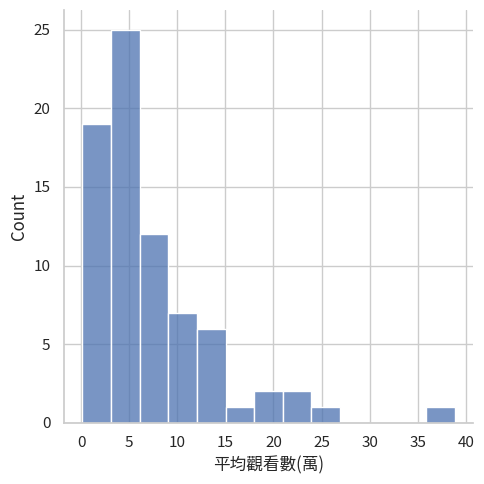

In [405]:
sns.displot(data=df_test, x='平均觀看數(萬)')
plt.xticks([0,5,10,15,20,25,30,35,40])
plt.show()

## 設定人氣度

In [406]:
p = df_test['平均觀看數(萬)'].to_list()
q = []

for number in p:
  if number >= 15:
    q.append(1)
  else:
    q.append(0)

df_test['人氣度'] = q
df_test1 = df_test[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]
df_test1

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,超能力,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,動作,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,0
2,異世界,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,青春,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,校園,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,校園,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,偶像,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,喜劇,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [407]:
print(df_test1['人氣度'].value_counts())
np.percentile(df_test['平均觀看數(萬)'],80)

0    69
1     7
Name: 人氣度, dtype: int64


10.76

## 資料不降維


### CountVectorizer

In [408]:
No_DR_TestList = ['18禁 bl 特攝']
for i in range(76):
    tagStr = []
    tags = df_test1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TestList.append(tagStr)
No_DR_TestList

['18禁 bl 特攝',
 '超能力 喜劇 職場 漫畫改編 新作',
 '動作 冒險 奇幻 超能力 血腥暴力 漫畫改編 新作',
 '異世界 魔法 校園 喜劇 戀愛 GL 小說改編 新作',
 '青春 競技 原創作品 新作',
 '校園 戀愛 小說改編 新作',
 '冒險 奇幻 魔法 小說改編 續作',
 '冒險 奇幻 異世界 魔法 校園 時間穿越 小說改編 新作',
 '溫馨 親情 感人 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 職場 漫畫改編 新作',
 '異世界 魔法 戀愛 小說改編 續作',
 '校園 喜劇 戀愛 漫畫改編 續作',
 '冒險 奇幻 魔法 血腥暴力 黑暗 漫畫改編 新作',
 '動作 喜劇 漫畫改編 新作',
 '競技 音樂 原創作品 新作',
 '動作 喜劇 溫馨 親情 漫畫改編 續作',
 '競技 音樂 原創作品 續作',
 '喜劇 闔家觀賞 泡麵番 遊戲改編 新作',
 '校園 喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 奇幻 異世界 魔法 血腥暴力 小說改編 續作',
 '溫馨 闔家觀賞 泡麵番 漫畫改編 新作',
 '冒險 奇幻 異世界 魔法 小說改編 續作',
 '冒險 奇幻 血腥暴力 黑暗 小說改編 續作',
 '校園 偶像 音樂 原創作品 續作',
 '科幻 機甲 職場 小說改編 新作',
 '校園 青春 溫馨 漫畫改編 新作',
 '奇幻 魔法 戀愛 小說改編 新作',
 '溫馨 職場 漫畫改編 新作',
 '職場 時間穿越 漫畫改編 新作',
 '冒險 奇幻 魔法 喜劇 戰爭 小說改編 新作',
 '動作 超能力 漫畫改編 續作',
 '動作 喜劇 血腥暴力 漫畫改編 新作',
 '運動 競技 遊戲改編 續作',
 '科幻 職場 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '冒險 奇幻 異世界 小說改編 新作',
 '校園 青春 競技 小說改編 新作',
 '職場 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 歷史 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '喜劇 溫馨 悠閒 漫畫改編 新作',
 '異世界 料理 小說改編 新作',
 '推理 懸疑 漫畫改編 新作',
 '冒險 奇幻 漫畫改編 新作',
 '奇幻 魔法 喜劇

In [409]:
from sklearn.feature_extraction.text import CountVectorizer

x = No_DR_TestList
y = df_test['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(76, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### Random_Forest_60_10

In [410]:
from sklearn.metrics import classification_report
import joblib

NoDR_CV_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_CV_RF_60_10.pkl')

y_predict = NoDR_CV_RF_60_10.predict(x)

score = NoDR_CV_RF_60_10.score(x, y)

score = round(score, 2)

ret1 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret1)

0.8
              precision    recall  f1-score   support

         沒人氣       0.94      0.84      0.89        69
         有人氣       0.21      0.43      0.29         7

    accuracy                           0.80        76
   macro avg       0.57      0.63      0.59        76
weighted avg       0.87      0.80      0.83        76



In [411]:
# 複驗準確度
import random
from sklearn.model_selection import train_test_split
score_mean = []
for _ in range(10):
  x_t1, x_t2, y_t1, y_t2 = train_test_split(x, y, test_size=random.choice([0.1,0.2,0.3,0.4,0.5]))
  score1 = NoDR_CV_RF_60_10.score(x_t1, y_t1)
  score1 = round(score1,2)
  score2 = NoDR_CV_RF_60_10.score(x_t2, y_t2)
  score2 = round(score2,2)
  score_mean.append(score1)
  score_mean.append(score2)
  print(score1)
  print(score2)

score_series = pd.Series(score_mean)
score_series.describe()

0.77
0.87
0.8
0.81
0.8
0.81
0.81
0.75
0.79
0.82
0.79
0.82
0.78
1.0
0.75
0.91
0.74
0.87
0.68
0.92


count    20.000000
mean      0.814500
std       0.071707
min       0.680000
25%       0.777500
50%       0.805000
75%       0.832500
max       1.000000
dtype: float64

### TfidfVectorizer

In [412]:
No_DR_TestList = ['18禁 bl 特攝']
for i in range(76):
    tagStr = []
    tags = df_test1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TestList.append(tagStr)
No_DR_TestList

['18禁 bl 特攝',
 '超能力 喜劇 職場 漫畫改編 新作',
 '動作 冒險 奇幻 超能力 血腥暴力 漫畫改編 新作',
 '異世界 魔法 校園 喜劇 戀愛 GL 小說改編 新作',
 '青春 競技 原創作品 新作',
 '校園 戀愛 小說改編 新作',
 '冒險 奇幻 魔法 小說改編 續作',
 '冒險 奇幻 異世界 魔法 校園 時間穿越 小說改編 新作',
 '溫馨 親情 感人 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 職場 漫畫改編 新作',
 '異世界 魔法 戀愛 小說改編 續作',
 '校園 喜劇 戀愛 漫畫改編 續作',
 '冒險 奇幻 魔法 血腥暴力 黑暗 漫畫改編 新作',
 '動作 喜劇 漫畫改編 新作',
 '競技 音樂 原創作品 新作',
 '動作 喜劇 溫馨 親情 漫畫改編 續作',
 '競技 音樂 原創作品 續作',
 '喜劇 闔家觀賞 泡麵番 遊戲改編 新作',
 '校園 喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 奇幻 異世界 魔法 血腥暴力 小說改編 續作',
 '溫馨 闔家觀賞 泡麵番 漫畫改編 新作',
 '冒險 奇幻 異世界 魔法 小說改編 續作',
 '冒險 奇幻 血腥暴力 黑暗 小說改編 續作',
 '校園 偶像 音樂 原創作品 續作',
 '科幻 機甲 職場 小說改編 新作',
 '校園 青春 溫馨 漫畫改編 新作',
 '奇幻 魔法 戀愛 小說改編 新作',
 '溫馨 職場 漫畫改編 新作',
 '職場 時間穿越 漫畫改編 新作',
 '冒險 奇幻 魔法 喜劇 戰爭 小說改編 新作',
 '動作 超能力 漫畫改編 續作',
 '動作 喜劇 血腥暴力 漫畫改編 新作',
 '運動 競技 遊戲改編 續作',
 '科幻 職場 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '冒險 奇幻 異世界 小說改編 新作',
 '校園 青春 競技 小說改編 新作',
 '職場 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 歷史 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '喜劇 溫馨 悠閒 漫畫改編 新作',
 '異世界 料理 小說改編 新作',
 '推理 懸疑 漫畫改編 新作',
 '冒險 奇幻 漫畫改編 新作',
 '奇幻 魔法 喜劇

In [413]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = No_DR_TestList
y = df_test['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(76, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.60458128 ... 0.         0.32714441 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### Random_Forest_60_20

In [414]:
from sklearn.metrics import classification_report
import joblib

NoDR_Tfidf_RF_60_20 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Tfidf_RF_60_20.pkl')

y_predict = NoDR_Tfidf_RF_60_20.predict(x)

score = NoDR_Tfidf_RF_60_20.score(x, y)

score = round(score, 2)

ret2 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret2)

0.84
              precision    recall  f1-score   support

         沒人氣       0.93      0.90      0.91        69
         有人氣       0.22      0.29      0.25         7

    accuracy                           0.84        76
   macro avg       0.57      0.59      0.58        76
weighted avg       0.86      0.84      0.85        76



In [415]:
# 複驗準確度
import random
from sklearn.model_selection import train_test_split
score_mean = []
for _ in range(10):
  x_t1, x_t2, y_t1, y_t2 = train_test_split(x, y, test_size=random.choice([0.1,0.2,0.3,0.4,0.5]))
  score1 = NoDR_Tfidf_RF_60_20.score(x_t1, y_t1)
  score1 = round(score1,2)
  score2 = NoDR_Tfidf_RF_60_20.score(x_t2, y_t2)
  score2 = round(score2,2)
  score_mean.append(score1)
  score_mean.append(score2)
  print(score1)
  print(score2)

score_series = pd.Series(score_mean)
score_series.describe()

0.82
0.87
0.82
0.87
0.89
0.74
0.84
0.84
0.83
0.88
0.85
0.75
0.89
0.77
0.83
0.87
0.85
0.75
0.87
0.75


count    20.000000
mean      0.829000
std       0.050357
min       0.740000
25%       0.807500
50%       0.840000
75%       0.870000
max       0.890000
dtype: float64

### 對應字典法

In [416]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}

In [417]:
df_test2 = df_test1[['作品分類1','作品分類2','作品分類3','作品分類4','作品分類5','作品分類6','原作載體','新續作']]
df_test2['作品分類1'] = df_test2['作品分類1'].replace(dict1)
df_test2['作品分類2'] = df_test2['作品分類2'].replace(dict1)
df_test2['作品分類3'] = df_test2['作品分類3'].replace(dict1)
df_test2['作品分類4'] = df_test2['作品分類4'].replace(dict1)
df_test2['作品分類5'] = df_test2['作品分類5'].replace(dict1)
df_test2['作品分類6'] = df_test2['作品分類6'].replace(dict1)
df_test2['原作載體'] = df_test2['原作載體'].replace(dict2)
df_test2['新續作'] = df_test2['新續作'].replace(dict3)

df_test2['作品分類1'] = df_test2['作品分類1'].fillna(0)
df_test2['作品分類2'] = df_test2['作品分類2'].fillna(0)
df_test2['作品分類3'] = df_test2['作品分類3'].fillna(0)
df_test2['作品分類4'] = df_test2['作品分類4'].fillna(0)
df_test2['作品分類5'] = df_test2['作品分類5'].fillna(0)
df_test2['作品分類6'] = df_test2['作品分類6'].fillna(0)

df_test2['作品分類1'] = pd.to_numeric(df_test2['作品分類1'], downcast='integer')
df_test2['作品分類2'] = pd.to_numeric(df_test2['作品分類2'], downcast='integer')
df_test2['作品分類3'] = pd.to_numeric(df_test2['作品分類3'], downcast='integer')
df_test2['作品分類4'] = pd.to_numeric(df_test2['作品分類4'], downcast='integer')
df_test2['作品分類5'] = pd.to_numeric(df_test2['作品分類5'], downcast='integer')
df_test2['作品分類6'] = pd.to_numeric(df_test2['作品分類6'], downcast='integer')
df_test2

<ipython-input-417-799b70664fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['作品分類1'] = df_test2['作品分類1'].replace(dict1)
<ipython-input-417-799b70664fe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['作品分類2'] = df_test2['作品分類2'].replace(dict1)
<ipython-input-417-799b70664fe4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
0,19,4,22,0,0,0,1,1
1,5,2,1,19,23,0,1,1
2,8,10,3,4,6,36,2,1
3,7,13,0,0,0,0,3,1
4,3,6,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
71,3,4,7,14,0,0,3,1
72,21,14,0,0,0,0,3,2
73,4,25,20,0,0,0,1,1
74,5,1,19,3,23,15,1,2


In [418]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   作品分類1   76 non-null     int8 
 1   作品分類2   76 non-null     int8 
 2   作品分類3   76 non-null     int8 
 3   作品分類4   76 non-null     int8 
 4   作品分類5   76 non-null     int8 
 5   作品分類6   76 non-null     int8 
 6   原作載體    76 non-null     int64
 7   新續作     76 non-null     int64
dtypes: int64(2), int8(6)
memory usage: 1.8 KB


#### Random_forest_60_10

In [419]:
from sklearn.metrics import classification_report
import joblib

x = df_test2.values
y = df_test['人氣度']

NoDR_Encoder_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/NoDR_Encoder_RF_60_10.pkl')

y_predict = NoDR_Encoder_RF_60_10.predict(x)

score = NoDR_Encoder_RF_60_10.score(x, y)

score = round(score, 2)

ret3 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret3)

0.76
              precision    recall  f1-score   support

         沒人氣       0.93      0.80      0.86        69
         有人氣       0.18      0.43      0.25         7

    accuracy                           0.76        76
   macro avg       0.55      0.61      0.55        76
weighted avg       0.86      0.76      0.80        76



In [420]:
# 複驗準確度
import random
from sklearn.model_selection import train_test_split
score_mean = []
for _ in range(10):
  x_t1, x_t2, y_t1, y_t2 = train_test_split(x, y, test_size=random.choice([0.2,0.3,0.4,0.5,0.6]))
  score1 = NoDR_Encoder_RF_60_10.score(x_t1, y_t1)
  score1 = round(score1,2)
  score2 = NoDR_Encoder_RF_60_10.score(x_t2, y_t2)
  score2 = round(score2,2)
  score_mean.append(score1)
  score_mean.append(score2)
  print(score1)
  print(score2)

score_series = pd.Series(score_mean)
score_series.describe()

0.7
0.8
0.74
0.79
0.77
0.75
0.8
0.71
0.81
0.65
0.83
0.61
0.75
0.81
0.77
0.75
0.77
0.75
0.73
0.81


count    20.000000
mean      0.755000
std       0.055583
min       0.610000
25%       0.737500
50%       0.760000
75%       0.800000
max       0.830000
dtype: float64

## 手動資料降維

In [421]:
df_test2 = df_test1
df_test2

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,超能力,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,動作,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,0
2,異世界,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,青春,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,校園,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,校園,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,偶像,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,喜劇,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [422]:
df_tag = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/pure_tag_table.csv')
for tag in df_tag['index']:
  mask1 = df_test2['作品分類1'] == tag
  mask2 = df_test2['作品分類2'] == tag
  mask3 = df_test2['作品分類3'] == tag
  mask4 = df_test2['作品分類4'] == tag
  mask5 = df_test2['作品分類5'] == tag
  mask6 = df_test2['作品分類6'] == tag
  for index in df_test2.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].index:
    df_test2.iloc[index,0] = tag
df_test2

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,職場,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,血腥暴力,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,0
2,GL,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,競技,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,戀愛,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,音樂,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,音樂,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,推理,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,血腥暴力,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [423]:
df_test3 = df_test2[['作品分類1', '原作載體', '新續作']]
df_test3

,作品分類1,原作載體,新續作
0,職場,漫畫改編,新作
1,血腥暴力,漫畫改編,新作
2,GL,小說改編,新作
3,競技,原創作品,新作
4,戀愛,小說改編,新作
...,...,...,...
71,音樂,原創作品,新作
72,音樂,原創作品,續作
73,推理,漫畫改編,新作
74,血腥暴力,漫畫改編,續作


In [424]:
df_test3['作品分類1'].value_counts()

魔法      8
血腥暴力    5
戀愛      5
異世界     5
職場      4
青春      4
奇幻      4
黑暗      4
音樂      4
競技      3
時間穿越    3
喜劇      3
泡麵番     3
超能力     2
親情      2
偶像      2
感人      2
懸疑      2
運動      1
闔家觀賞    1
料理      1
冒險      1
機甲      1
悠閒      1
歷史      1
戰爭      1
溫馨      1
GL      1
推理      1
Name: 作品分類1, dtype: int64

### CountVectorizer

In [425]:
DR_TestList = ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
for i in range(76):
    tagStr = []
    tags = df_test3.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TestList.append(tagStr)
DR_TestList

['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 新作',
 'GL 小說改編 新作',
 '競技 原創作品 新作',
 '戀愛 小說改編 新作',
 '魔法 小說改編 續作',
 '時間穿越 小說改編 新作',
 '感人 漫畫改編 新作',
 '職場 漫畫改編 新作',
 '魔法 小說改編 續作',
 '戀愛 漫畫改編 續作',
 '黑暗 漫畫改編 新作',
 '喜劇 漫畫改編 新作',
 '音樂 原創作品 新作',
 '親情 漫畫改編 續作',
 '音樂 原創作品 續作',
 '泡麵番 遊戲改編 新作',
 '戀愛 漫畫改編 新作',
 '血腥暴力 小說改編 續作',
 '泡麵番 漫畫改編 新作',
 '魔法 小說改編 續作',
 '黑暗 小說改編 續作',
 '偶像 原創作品 續作',
 '機甲 小說改編 新作',
 '溫馨 漫畫改編 新作',
 '魔法 小說改編 新作',
 '職場 漫畫改編 新作',
 '時間穿越 漫畫改編 新作',
 '戰爭 小說改編 新作',
 '超能力 漫畫改編 續作',
 '血腥暴力 漫畫改編 新作',
 '競技 遊戲改編 續作',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '異世界 小說改編 新作',
 '競技 小說改編 新作',
 '泡麵番 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '歷史 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '悠閒 漫畫改編 新作',
 '料理 小說改編 新作',
 '懸疑 漫畫改編 新作',
 '奇幻 漫畫改編 新作',
 '親情 漫畫改編 新作',
 '魔法 小說改編 新作',
 '奇幻 小說改編 新作',
 '戀愛 漫畫改編 新作',
 '感人 漫畫改編 新作',
 '黑暗 小說改編 新作',
 '冒險 小說改編 新作',
 '闔家觀賞 漫畫改編 續作',
 '運動 原創作品 新作',
 '黑暗 漫畫改編 新作',
 '懸疑 小說改編 新作',
 '異世界 小說改編 新作',
 '青春 漫畫改編 續作',
 '魔法 小說改編 續作',
 '青春 漫畫改編 續作',
 '青春 小說改編 新作',
 '喜劇 漫畫改編 新作',
 '奇幻 遊戲改編 新作',
 '超能力 原創作品 新作',
 '魔

In [426]:
from sklearn.feature_extraction.text import CountVectorizer

x = DR_TestList
y = df_test['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(76, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### Random_Forest_60_20

In [427]:
from sklearn.metrics import classification_report
import joblib

DR_CV_RF_60_20 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_CV_RF_60_20.pkl')

y_predict = DR_CV_RF_60_20.predict(x)

score = DR_CV_RF_60_20.score(x, y)

score = round(score, 2)

ret4 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret4)

0.66
              precision    recall  f1-score   support

         沒人氣       0.92      0.68      0.78        69
         有人氣       0.12      0.43      0.19         7

    accuracy                           0.66        76
   macro avg       0.52      0.55      0.49        76
weighted avg       0.85      0.66      0.73        76



In [428]:
# 複驗準確度
import random
from sklearn.model_selection import train_test_split
score_mean = []
for _ in range(10):
  x_t1, x_t2, y_t1, y_t2 = train_test_split(x, y, test_size=random.choice([0.1,0.2,0.3,0.4,0.5]))
  score1 = DR_CV_RF_60_20.score(x_t1, y_t1)
  score1 = round(score1,2)
  score2 = DR_CV_RF_60_20.score(x_t2, y_t2)
  score2 = round(score2,2)
  score_mean.append(score1)
  score_mean.append(score2)
  print(score1)
  print(score2)

score_series = pd.Series(score_mean)
score_series.describe()

0.67
0.62
0.64
0.7
0.61
0.71
0.69
0.61
0.68
0.63
0.6
0.74
0.63
0.88
0.66
0.62
0.66
0.62
0.64
0.68


count    20.000000
mean      0.664500
std       0.063368
min       0.600000
25%       0.620000
50%       0.650000
75%       0.682500
max       0.880000
dtype: float64

### TfidfVectorizer

In [429]:
DR_TestList = ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
for i in range(76):
    tagStr = []
    tags = df_test3.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TestList.append(tagStr)
DR_TestList

['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 新作',
 'GL 小說改編 新作',
 '競技 原創作品 新作',
 '戀愛 小說改編 新作',
 '魔法 小說改編 續作',
 '時間穿越 小說改編 新作',
 '感人 漫畫改編 新作',
 '職場 漫畫改編 新作',
 '魔法 小說改編 續作',
 '戀愛 漫畫改編 續作',
 '黑暗 漫畫改編 新作',
 '喜劇 漫畫改編 新作',
 '音樂 原創作品 新作',
 '親情 漫畫改編 續作',
 '音樂 原創作品 續作',
 '泡麵番 遊戲改編 新作',
 '戀愛 漫畫改編 新作',
 '血腥暴力 小說改編 續作',
 '泡麵番 漫畫改編 新作',
 '魔法 小說改編 續作',
 '黑暗 小說改編 續作',
 '偶像 原創作品 續作',
 '機甲 小說改編 新作',
 '溫馨 漫畫改編 新作',
 '魔法 小說改編 新作',
 '職場 漫畫改編 新作',
 '時間穿越 漫畫改編 新作',
 '戰爭 小說改編 新作',
 '超能力 漫畫改編 續作',
 '血腥暴力 漫畫改編 新作',
 '競技 遊戲改編 續作',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '異世界 小說改編 新作',
 '競技 小說改編 新作',
 '泡麵番 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '歷史 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '悠閒 漫畫改編 新作',
 '料理 小說改編 新作',
 '懸疑 漫畫改編 新作',
 '奇幻 漫畫改編 新作',
 '親情 漫畫改編 新作',
 '魔法 小說改編 新作',
 '奇幻 小說改編 新作',
 '戀愛 漫畫改編 新作',
 '感人 漫畫改編 新作',
 '黑暗 小說改編 新作',
 '冒險 小說改編 新作',
 '闔家觀賞 漫畫改編 續作',
 '運動 原創作品 新作',
 '黑暗 漫畫改編 新作',
 '懸疑 小說改編 新作',
 '異世界 小說改編 新作',
 '青春 漫畫改編 續作',
 '魔法 小說改編 續作',
 '青春 漫畫改編 續作',
 '青春 小說改編 新作',
 '喜劇 漫畫改編 新作',
 '奇幻 遊戲改編 新作',
 '超能力 原創作品 新作',
 '魔

In [430]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = DR_TestList
y = df_test['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
x = list(x)
del x[0]
x = np.array(x)

print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(76, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.89181757 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


#### Random_Forest_60_10

In [431]:
from sklearn.metrics import classification_report
import joblib

DR_Tfidf_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Tfidf_RF_60_10.pkl')

y_predict = DR_Tfidf_RF_60_10.predict(x)

score = DR_Tfidf_RF_60_10.score(x, y)

score = round(score, 2)

ret5 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret5)

0.8
              precision    recall  f1-score   support

         沒人氣       0.92      0.86      0.89        69
         有人氣       0.17      0.29      0.21         7

    accuracy                           0.80        76
   macro avg       0.54      0.57      0.55        76
weighted avg       0.85      0.80      0.82        76



In [432]:
# 複驗準確度
import random
from sklearn.model_selection import train_test_split
score_mean = []
for _ in range(10):
  x_t1, x_t2, y_t1, y_t2 = train_test_split(x, y, test_size=random.choice([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
  score1 = DR_Tfidf_RF_60_10.score(x_t1, y_t1)
  score1 = round(score1,2)
  score2 = DR_Tfidf_RF_60_10.score(x_t2, y_t2)
  score2 = round(score2,2)
  score_mean.append(score1)
  score_mean.append(score2)
  print(score1)
  print(score2)

score_series = pd.Series(score_mean)
score_series.describe()

0.67
0.84
0.77
0.81
0.81
0.78
0.95
0.74
0.82
0.75
0.57
0.83
0.87
0.79
0.78
0.88
0.78
0.88
0.78
0.84


count    20.000000
mean      0.797000
std       0.080531
min       0.570000
25%       0.777500
50%       0.800000
75%       0.840000
max       0.950000
dtype: float64

### 字典對應法

In [433]:
df_test4 = df_test3[['作品分類1', '原作載體', '新續作']]

# 非數值資料轉換
df_test4['作品分類1'] = df_test4['作品分類1'].replace(dict1)
df_test4['原作載體'] = df_test4['原作載體'].replace(dict2)
df_test4['新續作'] = df_test4['新續作'].replace(dict3)

df_test4

,作品分類1,原作載體,新續作
0,22,1,1
1,23,1,1
2,36,2,1
3,13,3,1
4,6,2,1
...,...,...,...
71,14,3,1
72,14,3,2
73,25,1,1
74,23,1,2


#### Random_Forest_30_20

In [434]:
from sklearn.metrics import classification_report
import joblib

x = df_test4.values
y = df_test['人氣度']

DR_Encoder_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_Encoder_RF_60_10.pkl')

y_predict = DR_Encoder_RF_60_10.predict(x)

score = DR_Encoder_RF_60_10.score(x, y)

score = round(score, 2)

ret6 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret6)

0.74
              precision    recall  f1-score   support

         沒人氣       0.93      0.77      0.84        69
         有人氣       0.16      0.43      0.23         7

    accuracy                           0.74        76
   macro avg       0.54      0.60      0.54        76
weighted avg       0.86      0.74      0.79        76



In [435]:
# 複驗準確度
import random
from sklearn.model_selection import train_test_split
score_mean = []
for _ in range(10):
  x_t1, x_t2, y_t1, y_t2 = train_test_split(x, y, test_size=random.choice([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
  score1 = DR_Encoder_RF_60_10.score(x_t1, y_t1)
  score1 = round(score1,2)
  score2 = DR_Encoder_RF_60_10.score(x_t2, y_t2)
  score2 = round(score2,2)
  score_mean.append(score1)
  score_mean.append(score2)
  print(score1)
  print(score2)

score_series = pd.Series(score_mean)
score_series.describe()

0.78
0.56
0.68
0.76
0.8
0.72
0.68
0.76
0.7
0.88
0.82
0.44
0.71
0.76
0.77
0.72
0.72
0.88
0.7
0.88


count    20.000000
mean      0.736000
std       0.104398
min       0.440000
25%       0.700000
50%       0.740000
75%       0.785000
max       0.880000
dtype: float64

### DictVectorizer

In [436]:
# 補足df_test4缺少的標籤(必須與訓練資料一樣)
# ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
df_test5 = pd.concat([df_test3, pd.DataFrame([['18禁','原創作品','新作'],
               ['bl','原創作品','新作'],
               ['特攝','原創作品','新作'],
               ['動作','原創作品','新作'],
               ['勵志','原創作品','新作'],
               ['校園','原創作品','新作'],
               ['科幻','原創作品','新作'],
               ['靈異神怪','原創作品','新作']], columns=['作品分類1', '原作載體', '新續作'])])

df_test5.tail(10)

,作品分類1,原作載體,新續作
74,血腥暴力,漫畫改編,續作
75,異世界,小說改編,新作
0,18禁,原創作品,新作
1,bl,原創作品,新作
2,特攝,原創作品,新作
3,動作,原創作品,新作
4,勵志,原創作品,新作
5,校園,原創作品,新作
6,科幻,原創作品,新作
7,靈異神怪,原創作品,新作


In [437]:
from sklearn.feature_extraction import DictVectorizer
dict = DictVectorizer(sparse=False)

x = df_test5[['作品分類1', '原作載體', '新續作']]
y = df_test['人氣度']

dict = DictVectorizer(sparse=False)
x = dict.fit_transform(x.to_dict(orient='records'))
x = list(x)
del x[-8:]
x = np.array(x)

print(x.shape)
print()
print('訓練資料：')
print(x)
print()
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())

(76, 43)

訓練資料：
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]

onehot 特徵名稱：
['作品分類1=18禁' '作品分類1=GL' '作品分類1=bl' '作品分類1=偶像' '作品分類1=冒險' '作品分類1=動作'
 '作品分類1=勵志' '作品分類1=喜劇' '作品分類1=奇幻' '作品分類1=悠閒' '作品分類1=感人' '作品分類1=懸疑'
 '作品分類1=戀愛' '作品分類1=戰爭' '作品分類1=推理' '作品分類1=料理' '作品分類1=時間穿越' '作品分類1=校園'
 '作品分類1=機甲' '作品分類1=歷史' '作品分類1=泡麵番' '作品分類1=溫馨' '作品分類1=特攝' '作品分類1=異世界'
 '作品分類1=科幻' '作品分類1=競技' '作品分類1=職場' '作品分類1=血腥暴力' '作品分類1=親情' '作品分類1=超能力'
 '作品分類1=運動' '作品分類1=闔家觀賞' '作品分類1=靈異神怪' '作品分類1=青春' '作品分類1=音樂' '作品分類1=魔法'
 '作品分類1=黑暗' '原作載體=原創作品' '原作載體=小說改編' '原作載體=漫畫改編' '原作載體=遊戲改編' '新續作=新作'
 '新續作=續作']


#### Random_Forest_20_10

In [438]:
from sklearn.metrics import classification_report
import joblib

DR_DV_RF_60_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DV_RF_60_10.pkl')

y_predict = DR_DV_RF_60_10.predict(x)

score = DR_DV_RF_60_10.score(x, y)

score = round(score, 2)

ret7 = classification_report(y, y_predict, labels=(0,1), target_names=('沒人氣','有人氣'))

print(score)
print(ret7)

0.76
              precision    recall  f1-score   support

         沒人氣       0.95      0.78      0.86        69
         有人氣       0.21      0.57      0.31         7

    accuracy                           0.76        76
   macro avg       0.58      0.68      0.58        76
weighted avg       0.88      0.76      0.81        76



In [439]:
# 複驗準確度
import random
from sklearn.model_selection import train_test_split
score_mean = []
for _ in range(10):
  x_t1, x_t2, y_t1, y_t2 = train_test_split(x, y, test_size=random.choice([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
  score1 = DR_DV_RF_60_10.score(x_t1, y_t1)
  score1 = round(score1,2)
  score2 = DR_DV_RF_60_10.score(x_t2, y_t2)
  score2 = round(score2,2)
  score_mean.append(score1)
  score_mean.append(score2)
  print(score1)
  print(score2)

score_series = pd.Series(score_mean)
score_series.describe()

0.75
0.78
0.72
0.87
0.75
0.88
0.78
0.69
0.73
0.77
0.71
0.77
0.73
0.88
0.83
0.72
0.78
0.69
0.71
0.84


count    20.00000
mean      0.76900
std       0.06155
min       0.69000
25%       0.72000
50%       0.76000
75%       0.79250
max       0.88000
dtype: float64

## 混淆矩陣

In [440]:
rets = [ret1, ret2, ret3, ret4, ret5, ret6, ret7]
for ret in rets:
  print(ret)

              precision    recall  f1-score   support

         沒人氣       0.94      0.84      0.89        69
         有人氣       0.21      0.43      0.29         7

    accuracy                           0.80        76
   macro avg       0.57      0.63      0.59        76
weighted avg       0.87      0.80      0.83        76

              precision    recall  f1-score   support

         沒人氣       0.93      0.90      0.91        69
         有人氣       0.22      0.29      0.25         7

    accuracy                           0.84        76
   macro avg       0.57      0.59      0.58        76
weighted avg       0.86      0.84      0.85        76

              precision    recall  f1-score   support

         沒人氣       0.93      0.80      0.86        69
         有人氣       0.18      0.43      0.25         7

    accuracy                           0.76        76
   macro avg       0.55      0.61      0.55        76
weighted avg       0.86      0.76      0.80        76

              preci

### 實例說明精確率、召回率

In [441]:
# # 預測沒人看的作品，真的沒人看 -> 0.93
# # 預測有人看的作品，真的有人看 -> 0.16
# # 沒人氣的作品，預測沒人氣   -> 0.77
# # 有人氣的作品，預測有人氣   -> 0.43

# 有人氣的作品，預測有人氣

# x1 = []
# y1 = []
# for index in df_test[df_test1['人氣度']==1].index:
#   x1.append(x[index])
#   y1.append(y[index])
# y_predeict = NoDR_Tfidf_RF_10_20.predict(x1)
# score = NoDR_Tfidf_RF_10_20.score(x1, y1)
# score = round(score, 2)
# print(score)
# print(y1)
# print(y_predeict)

In [442]:
# 沒人氣的作品，預測沒人氣

# indices is a tuple of two arrays
# indices = np.where(y_predict == 1)
# indices = indices[0]
# print(indices)
# df_test[df_test['人氣度'] == 0].iloc[indices]

# 結論


1. 隨機森林 > 決策樹 > 單純貝氏
2. TfidfVectorizer > CountVectorizer(未降維) = DictVectorizer > 對應字典法
3. 特徵數減少後，決策樹的準確率也不錯
4. 機器學習模型解釋力不高  
5. 模型缺陷:人氣度區隔標準
6. 待克服:
  - 原始資料轉換矩陣
  - 加入新資料(導演、製作公司)
  - 建立迴歸模型

# 附錄:影響觀看數關鍵因子

In [232]:
# 各標籤占比
df_ratio_table = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/ratio_table.csv')
df_ratio_table

,index,全部,前25%,比例(%)
0,異世界,53,32,60.38
1,時間穿越,5,3,60.00
2,魔法,48,28,58.33
3,小說改編,103,56,54.37
4,血腥暴力,21,11,52.38
5,GL,2,1,50.00
6,奇幻,145,61,42.07
7,超能力,27,11,40.74
8,動作,95,38,40.00
9,冒險,129,50,38.76


In [233]:
# 降維後的資料表加入「平均觀看數(萬)」
df6 = df3[['作品分類1', '原作載體', '新續作']]
df6['平均觀看數(萬)'] = df['平均觀看數(萬)']
df6

,作品分類1,原作載體,新續作,平均觀看數(萬)
0,悠閒,漫畫改編,新作,1.8
1,泡麵番,漫畫改編,新作,0.3
2,血腥暴力,漫畫改編,續作,49.9
3,音樂,遊戲改編,續作,1.9
4,歷史,遊戲改編,續作,1.6
...,...,...,...,...
433,18禁,漫畫改編,新作,8.0
434,18禁,漫畫改編,新作,11.3
435,18禁,漫畫改編,新作,11.2
436,悠閒,漫畫改編,新作,0.4


## 作品分類

In [234]:
# 每種標籤觀看數統計
d = {}
for item in df_tag['index']:
  mask = df6['作品分類1'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_tag_view = pd.DataFrame(d)
df_tag_view = df_tag_view.T.sort_values('最高', ascending=False)
df_tag_view

,最低,平均,中位數,最高
血腥暴力,1.8,31.0,19.0,93.3
戀愛,1.7,14.9,12.7,77.6
親情,0.1,14.1,7.7,70.4
偶像,0.6,6.7,2.4,64.2
青春,0.7,14.4,8.0,63.3
音樂,0.4,8.9,2.1,63.2
魔法,1.2,21.1,16.5,61.8
戰爭,1.6,15.6,6.8,59.3
喜劇,0.1,15.2,11.0,53.3
異世界,3.6,15.8,12.5,48.4


In [443]:
t1 = []
for item in df_tag_view.index:
  num = df6['作品分類1'].value_counts()[item]
  t1.append(num)
df_tag_view['個數'] = t1

df_tag_view[df_tag_view.中位數 > 10]

,最低,平均,中位數,最高,個數
血腥暴力,1.8,31.0,19.0,93.3,14
戀愛,1.7,14.9,12.7,77.6,25
魔法,1.2,21.1,16.5,61.8,35
喜劇,0.1,15.2,11.0,53.3,12
異世界,3.6,15.8,12.5,48.4,17
時間穿越,2.4,15.7,15.5,32.5,5
料理,2.1,12.7,13.0,28.9,7
勵志,3.0,13.8,11.1,26.4,8
超能力,0.3,12.1,14.6,23.9,8
感人,2.5,9.9,12.9,16.2,5


In [235]:
df6[df6['作品分類1']=='料理'].index
df.iloc[[17, 91, 139, 189, 210, 388, 427]]

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬),人氣度
17,擁有超常技能的異世界流浪美食家,2023,冬番,12,4.9,22100,松田清,MAPPA,冒險,奇幻,異世界,料理,NaN,NaN,小說改編,新作,28.9,346.5,1
91,相合之物,2022,春番,12,4.9,6400,追崎史敏,ENCOURAGE FILMS,溫馨,悠閒,料理,親情,職場,NaN,漫畫改編,新作,7.5,89.9,0
139,搖曳露營△ 第二季,2021,冬番,13,5.0,8100,京極義昭,C-Station,溫馨,悠閒,料理,闔家觀賞,NaN,NaN,漫畫改編,續作,13.0,168.5,0
189,舞伎家的料理人,2021,冬番,12,4.9,1100,鈴木洋平,J.C.STAFF,溫馨,料理,闔家觀賞,NaN,NaN,NaN,漫畫改編,新作,2.1,24.8,0
210,食戟之靈 豪之皿,2020,春番,13,4.6,1500,米谷良知,J.C.STAFF,校園,料理,NaN,NaN,NaN,NaN,漫畫改編,續作,13.9,180.7,0
388,異世界食堂 2,2021,秋番,12,4.9,5000,神保昌登,OLM,奇幻,異世界,溫馨,料理,NaN,NaN,小說改編,續作,13.2,157.8,0
427,黃金神威 第三季,2020,秋番,12,5.0,3900,難波日登志,Geno Studio,動作,冒險,料理,歷史,NaN,NaN,漫畫改編,續作,10.6,126.6,0


## 原作載體

In [237]:
d = {}
for item in df6['原作載體'].unique():
  mask = df6['原作載體'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_original = pd.DataFrame(d)
df_original = df_original.T.sort_values('最高', ascending=False)
t1 = []
t2 = []
# for item in df_original.index:
#   s1 = df_ratio_table[df_ratio_table['index'] == item]['全部']
#   s2 = df_ratio_table[df_ratio_table['index'] == item]['前25%']
#   t1.append(s1.iloc[0])
#   t2.append(s2.iloc[0])
# df_original['全部'] = t1
# df_original['前25%'] = t2
df_original

,最低,平均,中位數,最高
漫畫改編,0.0,11.2,6.8,93.3
小說改編,0.3,17.6,14.4,61.8
原創作品,0.1,5.0,1.8,59.3
遊戲改編,0.2,2.7,1.9,15.8


## 新續作

In [238]:
d = {}
for item in df6['新續作'].unique():
  mask = df6['新續作'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_new_old = pd.DataFrame(d)
df_new_old = df_new_old.T.sort_values('最高', ascending=False)
t1 = []
t2 = []
# for item in df_new_old.index:
#   s1 = df_ratio_table[df_ratio_table['index'] == item]['全部']
#   s2 = df_ratio_table[df_ratio_table['index'] == item]['前25%']
#   t1.append(s1.iloc[0])
#   t2.append(s2.iloc[0])
# df_new_old['全部'] = t1
# df_new_old['前25%'] = t2
df_new_old

,最低,平均,中位數,最高
新作,0.0,9.7,5.6,93.3
續作,0.1,12.3,6.8,92.8


## 動畫製作公司

In [239]:
df7 = df[['製作廠商', '平均觀看數(萬)']]
d = {}
for key, value in df7.groupby('製作廠商').groups.items():
  s1 = df['平均觀看數(萬)'][value]
  d.update({key:{'最低':s1.min(), '平均':round(s1.mean(), ndigits=1), '中位數':s1.median(), '最高':s1.max(), '作品數':len(value)}})
df7 = pd.DataFrame(d)
df7 = df7.T
df7['作品數'] = pd.to_numeric(df7['作品數'], downcast='integer')
df7 = df7.sort_values('作品數', ascending=False)
# df7 = df7[(df7['最高'] > 14.0) & (df7['作品數'] >= 3)]
# df7.sort_values('最高', ascending=False)
df7

,最低,平均,中位數,最高,作品數
J.C.STAFF,0.6,11.0,9.70,31.6,15
A-1 Pictures,2.3,26.4,19.70,77.6,13
LIDENFILMS,0.7,6.2,2.50,20.3,13
CloverWorks,1.1,20.0,11.25,63.3,12
TMS Entertainment,0.7,8.6,7.70,23.2,10
...,...,...,...,...,...
SIGNAL.MD,1.6,1.6,1.60,1.6,1
SCIENCE SARU INC.,8.1,8.1,8.10,8.1,1
Project No.9,4.4,4.4,4.40,4.4,1
Passione×Studio Lings,2.5,2.5,2.50,2.5,1


## 儲存CSV

In [ ]:
df7.to_csv('/content/drive/MyDrive/Colab Notebooks/Anime_Company.csv', index_label='動畫公司')

In [ ]:
df_new_old.to_csv('/content/drive/MyDrive/Colab Notebooks/New_or_Sequel.csv', index_label='新續作')

In [ ]:
df_original.to_csv('/content/drive/MyDrive/Colab Notebooks/Original_or_Adapted.csv', index_label='原作載體')

In [ ]:
df_tag_view.to_csv('/content/drive/MyDrive/Colab Notebooks/Tags_View_Number.csv', index_label='標籤')